In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("wine_data.csv"    )
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
df=df.iloc[:,:3]


In [7]:
df.columns=["Class label","Alcohol","Malic Acid"]

In [8]:
df

,Class label,Alcohol,Malic Acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


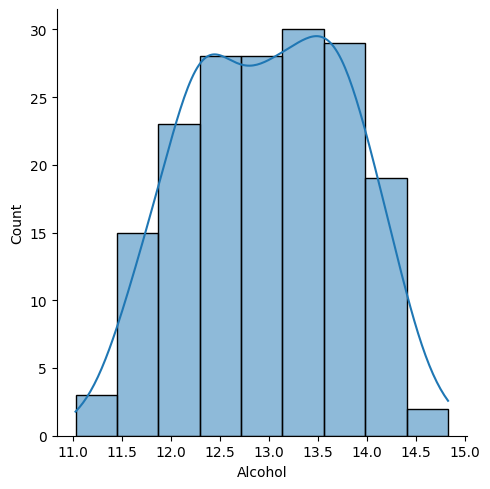

In [9]:
sns.displot(df["Alcohol"],kde=True)

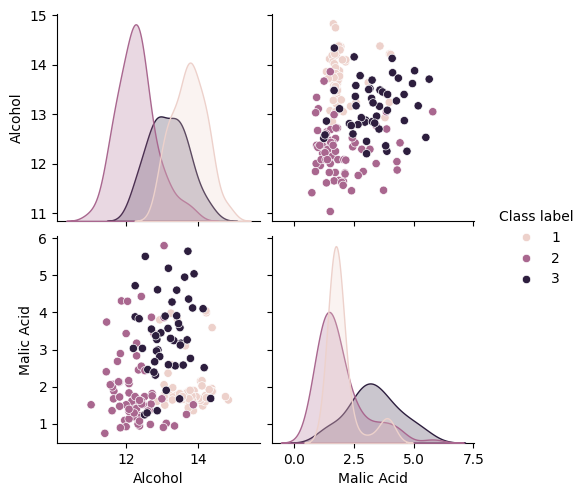

In [10]:
sns.pairplot(df, hue="Class label")

In [1]:
pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
from ydata_profiling import ProfileReport

In [11]:
profile = ProfileReport(df, title="Wine Data Profiling Report", explorative=True)
profile.to_file("wine_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00,  4.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.3, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123, 2), (54, 2), (123,), (54,))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)   

In [22]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [21]:
np.round(X_train_scaled.describe(), 1)


,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

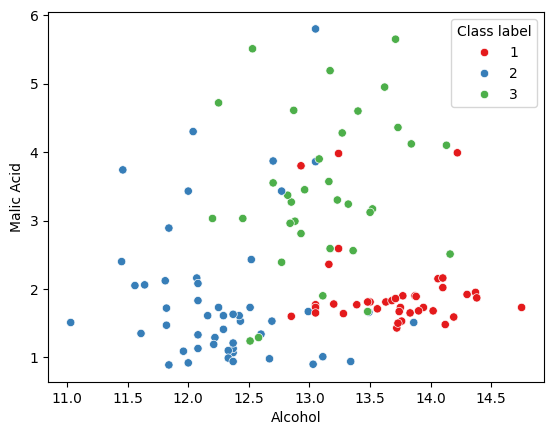

In [27]:
sns.scatterplot(x=X_train["Alcohol"], y=X_train["Malic Acid"], hue=y_train, palette="Set1")   

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

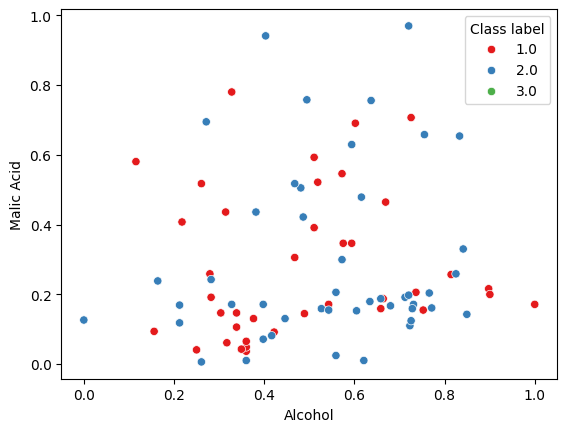

In [28]:
sns.scatterplot(x=X_train_scaled["Alcohol"], y=X_train_scaled["Malic Acid"], hue=y_train, palette="Set1")   

In [33]:
# perform preprocession of normalization using mean normalization

from sklearn.preprocessing import RobustScaler

mean_scaler = RobustScaler()
mean_scaler.fit(X_train)
X_train_mean_scaled = mean_scaler.transform(X_train)
X_test_mean_scaled = mean_scaler.transform(X_test)

X_train_mean_scaled = pd.DataFrame(X_train_mean_scaled, columns=X_train.columns)
X_test_mean_scaled = pd.DataFrame(X_test_mean_scaled, columns=X_test.columns)


In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123, 2), (54, 2), (123,), (54,))